# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [680]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests as req
import tweepy
import json
import seaborn as sns

In [681]:
df_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
df_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [682]:
# url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

# response = req.get(url)

# with open("image_predictions.tsv", mode = "wb") as file:
#     file.write(response.content)

df_prediction = pd.read_csv('image_predictions.tsv', sep = '\t')
df_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [683]:
with open('tweet_json.txt') as f:
    df_api = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])

df_api.columns = ['tweet_id', 'favorites', 'retweets']
df_api.set_index('tweet_id', inplace = True)
df_api.head()

,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [684]:
#First Let's process the first dataset 
df_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [685]:
# Let's explore the twitter-archive-enhanced.csv content 

In [686]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [687]:
df_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [688]:
df_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [689]:
df_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [690]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [691]:
# Let's explore the API content 
# with just a simple look of the dataset we can see that the api tweet_id is considered as index
# so we have to recreate the API index
df_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   favorites  2354 non-null   int64
 1   retweets   2354 non-null   int64
dtypes: int64(2)
memory usage: 55.2 KB


### Quality issues
1. The retweets publication date need be to renamed

2. Some rating_denominator greater than 10 and other less than 10

3. Wrong data type for tweets date

4. Dogs category issue (doggo or floofer or pupper or puppo)

5. The retweets publication date to rename

6. The name value is just a letter (Ex: a)

7. Some tweets are the representation others (Retweets) need to be cleaned

8. image_predictions name does sense anything things (need to be renamed)

### Tidiness issues
1. all datasets should be merge in the right order.
2. In the api dataset imported tweet_id is considered as index
3. image_predictions dataset columns are not ordered 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [692]:
# Make copies of original pieces of data
df_enh_copy = df_enhanced.copy()
df_api_copy = df_api.copy()
df_pred_copy = df_prediction.copy()
df_enh_copy.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [693]:
df_api_copy.head()

,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774


In [694]:
df_pred_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #1: In the api dataset imported tweet_id is considered as index (Tidiness 2)

#### Define: 

> We first need to create a new column named _**tweet_id**_ into the api dataset using the index
  

#### Code

In [695]:
df_api_copy = df_api_copy.reset_index()

#### Test

In [696]:
df_api_copy.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


### Issue #2: image_predictions dataset columns are not ordered (Tidiness 3)

#### Define: 

> We will create our own columns order from the existing one. 
> Then we reassign the dataset with that new order

#### Code

In [697]:
df_pred_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [698]:
head = ['tweet_id', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'jpg_url', 'img_num']
df_pred_copy = df_pred_copy[head]

#### Test

In [699]:
df_pred_copy.head()

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,jpg_url,img_num
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1
1,666029285002620928,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1
2,666033412701032449,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1
3,666044226329800704,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1
4,666049248165822465,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1


### Issue #3: The retweets publication date need be to renamed (Quality 5)

#### Define:

> We juste need to use pandas rename method to rename _**retweeted_status_timestamp**_ into _retweeted_date_

#### Code

In [700]:
df_enh_copy.rename(columns = {'retweeted_status_timestamp': 'retweeted_date'}, inplace =  True)

#### Test

In [701]:
df_enh_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweet_id                  2356 non-null   int64  
 1   in_reply_to_status_id     78 non-null     float64
 2   in_reply_to_user_id       78 non-null     float64
 3   timestamp                 2356 non-null   object 
 4   source                    2356 non-null   object 
 5   text                      2356 non-null   object 
 6   retweeted_status_id       181 non-null    float64
 7   retweeted_status_user_id  181 non-null    float64
 8   retweeted_date            181 non-null    object 
 9   expanded_urls             2297 non-null   object 
 10  rating_numerator          2356 non-null   int64  
 11  rating_denominator        2356 non-null   int64  
 12  name                      2356 non-null   object 
 13  doggo                     2356 non-null   object 
 14  floofer 

### Issue #4: Dogs category issues and all datasets should be merge in the right order. (Quality 4 and Tidiness 1)

#### Define: 

> For this issue we will loop througout each columns then check if a particular dog has a category and set with  a string value  in ['puppo', 'pupper', 'doggo', 'floofer']. After that we delete these columns in that list

#### Code

In [702]:
for index, column in df_enh_copy.iterrows():
    for word in ['puppo', 'pupper', 'doggo', 'floofer']:
        if word.lower() in str(df_enh_copy.loc[index, 'text']).lower():
            df_enh_copy.loc[index, 'category_dog'] = word.title()

In [703]:
df_enh_copy = df_enh_copy.drop(['puppo', 'pupper', 'doggo', 'floofer'], axis=1)

In [704]:
df = df_enh_copy.merge(df_api_copy, on='tweet_id', how= 'outer')
df = df.merge(df_pred_copy, on='tweet_id', how='outer')

In [705]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweet_id                  2356 non-null   int64  
 1   in_reply_to_status_id     78 non-null     float64
 2   in_reply_to_user_id       78 non-null     float64
 3   timestamp                 2356 non-null   object 
 4   source                    2356 non-null   object 
 5   text                      2356 non-null   object 
 6   retweeted_status_id       181 non-null    float64
 7   retweeted_status_user_id  181 non-null    float64
 8   retweeted_date            181 non-null    object 
 9   expanded_urls             2297 non-null   object 
 10  rating_numerator          2356 non-null   int64  
 11  rating_denominator        2356 non-null   int64  
 12  name                      2356 non-null   object 
 13  category_dog              423 non-null    object 
 14  favorite

In [706]:
df_enh_copy = df_enh_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_date'], axis=1)

#### Test

In [707]:
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_date,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,jpg_url,img_num
1076,739606147276148736,NaN,NaN,2016-06-05 23:53:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Benji. He just turned 1. Has already give...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739606147...,...,0.933755,True,cocker_spaniel,0.041719,True,Brittany_spaniel,0.006713,True,https://pbs.twimg.com/media/CkOb3FXW0AAUL_U.jpg,3.0
1835,676101918813499392,NaN,NaN,2015-12-13 18:10:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Striker. He's ready for Christmas. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676101918...,...,0.225848,True,Norfolk_terrier,0.186873,True,Irish_terrier,0.106987,True,https://pbs.twimg.com/media/CWH_FTgWIAAwOUy.jpg,1.0
27,886736880519319552,NaN,NaN,2017-07-16 23:58:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mingus. He's a wonderful father to his...,NaN,NaN,NaN,"https://www.gofundme.com/mingusneedsus,https:/...",...,0.309706,True,Great_Pyrenees,0.186136,True,Dandie_Dinmont,0.086346,True,https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg,1.0
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,...,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1.0
1072,739979191639244800,NaN,NaN,2016-06-07 00:36:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nollie. She's waving at you. If you do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739979191...,...,0.285800,True,wig,0.240653,False,toy_poodle,0.074914,True,https://pbs.twimg.com/media/CkTvJTdXAAAEfbT.jpg,1.0


### Issue #5: The tweets publication date to rename (Quality 1)

#### Define:

> We will rename the column named timestamp into tweet_date and retweeted_status_timestamp into retweeted_date.


#### Code

In [708]:
df.rename(columns = {'timestamp': 'tweet_date'}, inplace =  True)

#### Test

In [709]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweet_id                  2356 non-null   int64  
 1   in_reply_to_status_id     78 non-null     float64
 2   in_reply_to_user_id       78 non-null     float64
 3   tweet_date                2356 non-null   object 
 4   source                    2356 non-null   object 
 5   text                      2356 non-null   object 
 6   retweeted_status_id       181 non-null    float64
 7   retweeted_status_user_id  181 non-null    float64
 8   retweeted_date            181 non-null    object 
 9   expanded_urls             2297 non-null   object 
 10  rating_numerator          2356 non-null   int64  
 11  rating_denominator        2356 non-null   int64  
 12  name                      2356 non-null   object 
 13  category_dog              423 non-null    object 
 14  favorite

### Issue #6: Some rating_denominator greater than 10 and other less than 10 (Quality 2)

#### Define:

> Select all wrong index 

> Now drop these index from the dataset

#### Code

In [710]:
wrong_denominator = df[df.rating_denominator != 10].index
df.drop(wrong_denominator, axis=0, inplace=True)

#### Test

In [711]:
df[df.rating_denominator != 10].index

Int64Index([], dtype='int64')

In [712]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweet_id                  2333 non-null   int64  
 1   in_reply_to_status_id     73 non-null     float64
 2   in_reply_to_user_id       73 non-null     float64
 3   tweet_date                2333 non-null   object 
 4   source                    2333 non-null   object 
 5   text                      2333 non-null   object 
 6   retweeted_status_id       180 non-null    float64
 7   retweeted_status_user_id  180 non-null    float64
 8   retweeted_date            180 non-null    object 
 9   expanded_urls             2278 non-null   object 
 10  rating_numerator          2333 non-null   int64  
 11  rating_denominator        2333 non-null   int64  
 12  name                      2333 non-null   object 
 13  category_dog              415 non-null    object 
 14  favorite

### Issue #7: Wrong data type for tweets date (Quality 3)

#### Define:
> After that let's set the type of these columns from object to datetime

#### Code

In [713]:
df['tweet_date'] = df['tweet_date'].astype('datetime64[ns]')
df['retweeted_date'] = df['retweeted_date'].astype('datetime64[ns]')

#### Test

In [714]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   tweet_id                  2333 non-null   int64         
 1   in_reply_to_status_id     73 non-null     float64       
 2   in_reply_to_user_id       73 non-null     float64       
 3   tweet_date                2333 non-null   datetime64[ns]
 4   source                    2333 non-null   object        
 5   text                      2333 non-null   object        
 6   retweeted_status_id       180 non-null    float64       
 7   retweeted_status_user_id  180 non-null    float64       
 8   retweeted_date            180 non-null    datetime64[ns]
 9   expanded_urls             2278 non-null   object        
 10  rating_numerator          2333 non-null   int64         
 11  rating_denominator        2333 non-null   int64         
 12  name                

### Issue #8: Some tweets are the representation others (Retweets) need to be cleaned (Quality 6)

#### Define:

> Get index of retweets

> Drop retweets

#### Code

In [715]:
df = df[df.retweeted_status_id.isna()]

#### Test

In [716]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   tweet_id                  2153 non-null   int64         
 1   in_reply_to_status_id     73 non-null     float64       
 2   in_reply_to_user_id       73 non-null     float64       
 3   tweet_date                2153 non-null   datetime64[ns]
 4   source                    2153 non-null   object        
 5   text                      2153 non-null   object        
 6   retweeted_status_id       0 non-null      float64       
 7   retweeted_status_user_id  0 non-null      float64       
 8   retweeted_date            0 non-null      datetime64[ns]
 9   expanded_urls             2099 non-null   object        
 10  rating_numerator          2153 non-null   int64         
 11  rating_denominator        2153 non-null   int64         
 12  name                

### Issue #9: The name value is just a letter (Ex: a) (Quality 7)

#### Define:

> Retrieve Dogs named 'a' 

> Remove theses rows

#### Code

In [717]:
df.drop(df[df.name == 'a'].index, axis = 0, inplace = True)

#### Test

In [718]:
df[df.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_date,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,jpg_url,img_num


### Issue #10: Rename Some columns in the image_prediction part on dataset (Quality 8)

#### Define:
> Get colmuns
> Create news names and reassign

#### Code

In [719]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'tweet_date', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_date', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'category_dog',
       'favorites', 'retweets', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'jpg_url', 'img_num'],
      dtype='object')

In [720]:
df.rename({'p1': 'predict_1', 'p1_conf': 'predict_conf_1', 'p1_dog': 'predict_is_dog_1', 'p2': 'predict_2', 'p2_conf': 'predict_conf_2',
       'p2_dog': 'predict_is_dog_2', 'p3': 'predict3', 'p3_conf': 'predict_conf_p3', 'p3_dog': 'predict_is_dog_3'}, axis =1, inplace=True)

#### Test

In [721]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'tweet_date', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_date', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'category_dog',
       'favorites', 'retweets', 'predict_1', 'predict_conf_1',
       'predict_is_dog_1', 'predict_2', 'predict_conf_2', 'predict_is_dog_2',
       'predict3', 'predict_conf_p3', 'predict_is_dog_3', 'jpg_url',
       'img_num'],
      dtype='object')

In [729]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   tweet_id                  2099 non-null   int64         
 1   in_reply_to_status_id     73 non-null     float64       
 2   in_reply_to_user_id       73 non-null     float64       
 3   tweet_date                2099 non-null   datetime64[ns]
 4   source                    2099 non-null   object        
 5   text                      2099 non-null   object        
 6   retweeted_status_id       0 non-null      float64       
 7   retweeted_status_user_id  0 non-null      float64       
 8   retweeted_date            0 non-null      datetime64[ns]
 9   expanded_urls             2045 non-null   object        
 10  rating_numerator          2099 non-null   int64         
 11  rating_denominator        2099 non-null   int64         
 12  name                

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [722]:
df.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [723]:
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_date,expanded_urls,...,predict_conf_1,predict_is_dog_1,predict_2,predict_conf_2,predict_is_dog_2,predict3,predict_conf_p3,predict_is_dog_3,jpg_url,img_num
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0


In [724]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,favorites,retweets,predict_conf_1,predict_conf_2,predict_conf_p3,img_num
count,2.099000e+03,7.300000e+01,7.300000e+01,0.0,0.0,2099.000000,2099.0,2099.000000,2099.000000,1922.000000,1.922000e+03,1.922000e+03,1922.000000
mean,7.385084e+17,7.456060e+17,2.152128e+16,NaN,NaN,12.329204,10.0,8930.592663,2809.603144,0.593396,1.344859e-01,6.014662e-02,1.203954
std,6.771300e+16,7.600519e+16,1.294404e+17,NaN,NaN,43.220727,0.0,12156.956621,4693.119324,0.272944,1.005539e-01,5.084314e-02,0.560754
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,0.000000,10.0,52.000000,0.000000,0.044333,1.011300e-08,1.740170e-10,1.000000
25%,6.775527e+17,6.754971e+17,3.589728e+08,NaN,NaN,10.000000,10.0,2028.000000,623.500000,0.359913,5.415522e-02,1.594498e-02,1.000000
50%,7.116527e+17,7.044857e+17,4.196984e+09,NaN,NaN,11.000000,10.0,4180.000000,1375.000000,0.587026,1.175370e-01,4.922740e-02,1.000000
75%,7.915396e+17,8.233264e+17,4.196984e+09,NaN,NaN,12.000000,10.0,11347.500000,3261.000000,0.847216,1.953583e-01,9.208967e-02,1.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,NaN,NaN,1776.000000,10.0,132810.000000,79515.000000,1.000000,4.880140e-01,2.710420e-01,4.000000


### Insights:
1. Which is the best rated Dogs Category

2. Let's check Dog Category Like rate.

3. The favorite Dog Category

4. Create Dog rate

### Visualization

In [725]:
def show_fig(data, title, legend):
    fig, ax = plt.subplots()
    data.value_counts().plot(kind='bar', ax=ax, figsize= (7,7))
    ax.legend(legend);
    ax.set_title(title)


In [726]:
df['rating'] = df.rating_numerator/df.rating_denominator

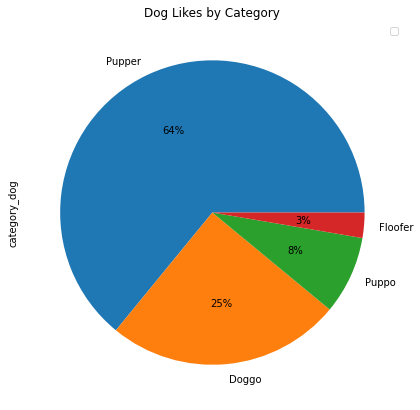

In [727]:
df_rated = df.category_dog
def show_pie(data, title, legend):
    fig, ax = plt.subplots()
    data.value_counts().plot(kind='pie', autopct='%.0f%%', ax=ax, figsize= (7,7))
    ax.legend(legend);
    ax.set_title(title)
show_pie(df_rated, "Dog Likes by Category", [])

In [728]:
df_rated = df.groupby('category_dog').favorites
# rates = df.rating.unique()
# rates.sort()
# rates
df_rated.sum()

category_dog
Doggo      1542317.0
Floofer     116749.0
Pupper     1668904.0
Puppo       626023.0
Name: favorites, dtype: float64

<a id='conclusions'></a>
## Conclusions

>    1. Which is the best rated Dogs Category
    > **Answer** : 
        > Pupper represents **64%** of all our dataset by rate. So Pupper showed to be the best rated Dogs Category
        
>    2. Let us check Dog Category Like rate.
        > **Answer** : 
            - Doggo      1542317.0
            - Floofer     116749.0
            - Pupper     1668904.0
            - Puppo       626023.0
            Pupper category has more likes than all other Category.
>    3. The favorite Dog Category
    > **Answer** :
    >   In general Pupper Category is the favorite. 

## Submitting your Project 